In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
import make_mst

In [2]:
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
one_month = raw_data[raw_data['month']=='2010-11']

In [3]:
G = make_mst.get_graph_distance('2010-11')
print('# of nodes', nx.number_of_nodes(G))

# of nodes 63


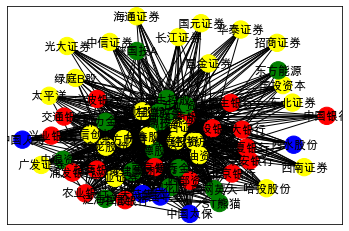

In [4]:
## original network
color = []
color_map = dict(G.nodes)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(G,node_color=color)

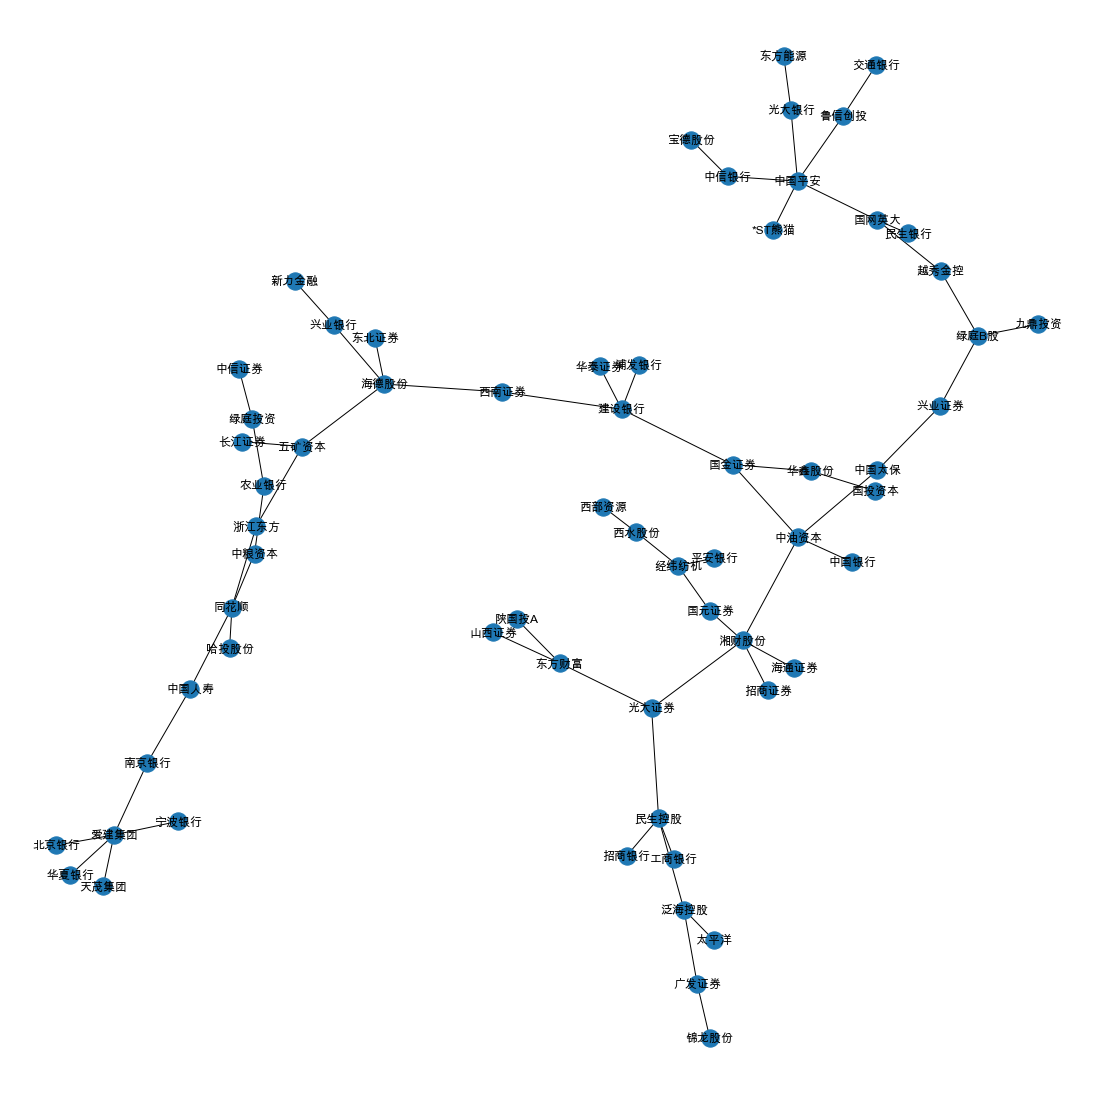

In [5]:
mst = nx.minimum_spanning_tree(G)
plt.figure(figsize=(15,15))
nx.draw(mst,with_labels=True)

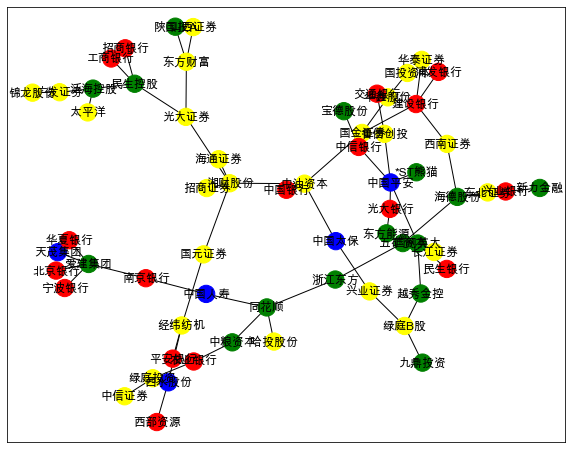

In [13]:
### MST

mst = nx.minimum_spanning_tree(G)
node_list = list(mst.nodes())

for i in range(len(node_list)):
    # print(node_list[i])
    if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
        mst.nodes[node_list[i]]['color'] ='yellow'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
        mst.nodes[node_list[i]]['color'] ='blue'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
        mst.nodes[node_list[i]]['color'] ='red'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
        mst.nodes[node_list[i]]['color'] ='green'
color = []
color_map = dict(mst.nodes)
# print(color_map)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(mst,node_color=color)


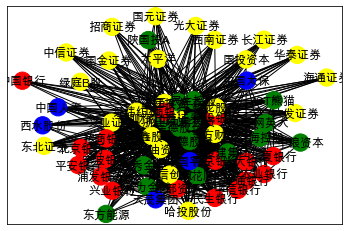

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
color = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw_networkx(G,node_color=color)


In [15]:
def get_colored_communities(mst):
    communities_generator = community.girvan_newman(mst)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    color_c = sorted(map(sorted, next_level_communities))
    print('number of communities: ',len(color_c))
    color = ['red','blue','yellow','green']
    color_map = []
    for node in mst:
        # print(node)
        if node in color_c[0]:
            color_map.append(color[0])
        elif node in color_c[1]:
            color_map.append(color[1])
        else:
            color_map.append(color[2])        
    plt.figure(figsize=(20,20))
    nx.draw_spring(mst,node_color = color_map,with_labels = True)

number of communities:  3


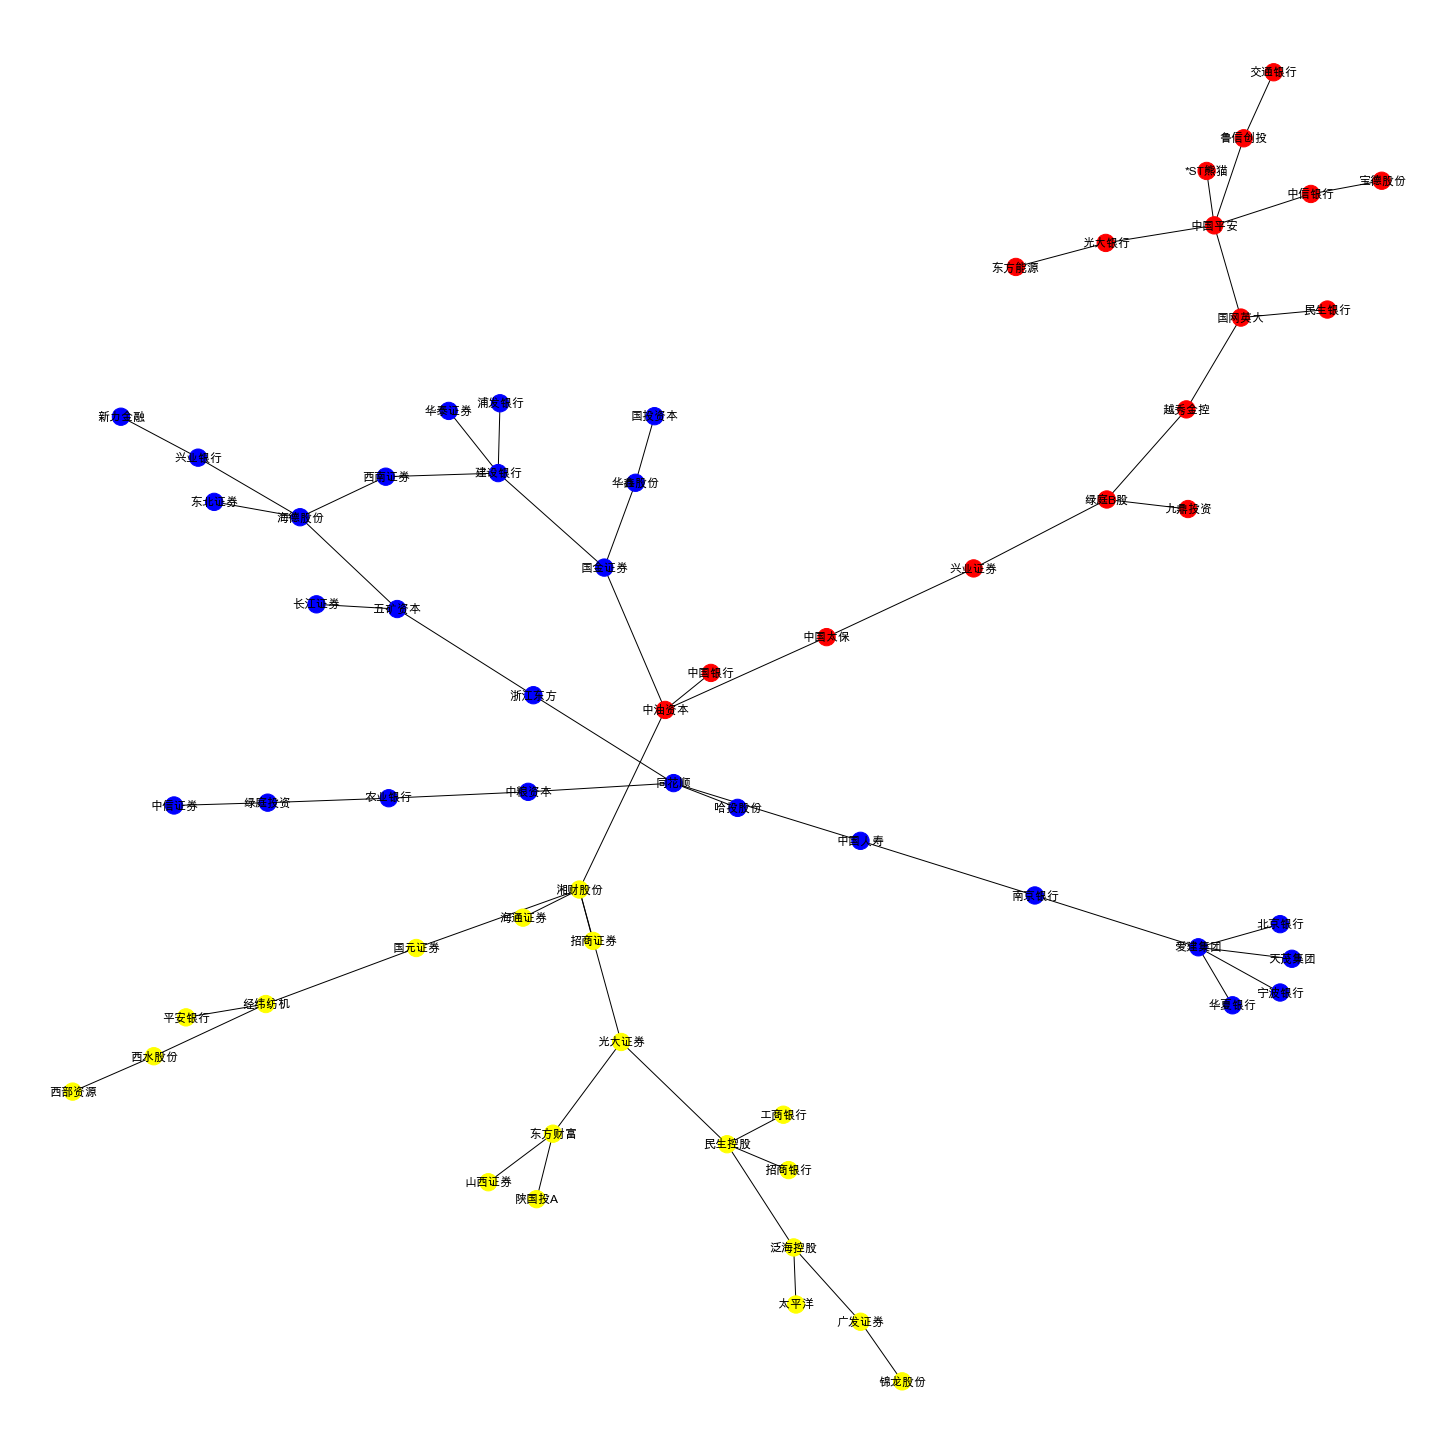

In [16]:
get_colored_communities(mst)